<a href="https://colab.research.google.com/github/Mund99/Medium_Writing/blob/main/StochasticOscillator_Calculation_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import warnings

warnings.filterwarnings('ignore')

In [27]:
# Download data from yahoo finance
ticker = 'TSLA'
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2024-01-01')

df = yf.download(ticker, start_date, end_date)
df.index = df.index.date

print(f"\nDataFrame Shape: {df.shape}\n")
display(df.info())
display(df.head())

[*********************100%%**********************]  1 of 1 completed


DataFrame Shape: (250, 6)

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB


None

,Open,High,Low,Close,Adj Close,Volume
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000


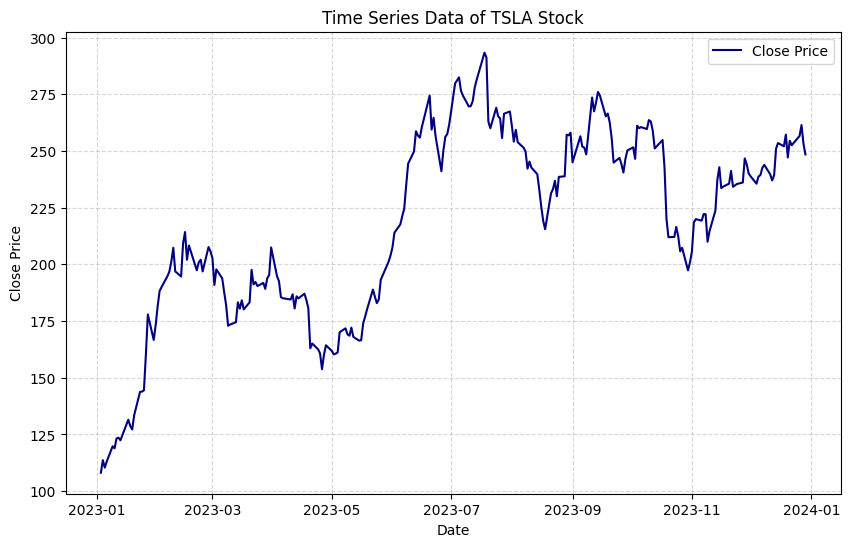

In [28]:
# Plot the close price
plt.figure(figsize=(10,6))

plt.plot(df['Close'], label='Close Price', color='navy')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Data of TSLA Stock')
plt.legend()
plt.grid(visible=True, alpha=0.5, linestyle='--')

plt.show()

# Stochastic Oscillator

In [29]:
# Define the lookback period for %k and %d
window_length = 14
smooth_k = 3

# Calculate highest high and lowest low over window_length periods
df['High_High'] = df['High'].rolling(window=window_length).max()
df['Low_Low'] = df['Low'].rolling(window=window_length).min()

# Calculate %K
df['%K'] = ((df['Close'] - df['Low_Low']) / (df['High_High'] - df['Low_Low'])) * 100

# Calculate %D (signal line)
df['%D'] = df['%K'].rolling(window=smooth_k).mean()

# Drop rows with NaN values resulting from rolling calculations
df = df.dropna()

In [30]:
def calculate_stochastic(df, window_length=14, smooth_k=3):
    """
    Calculates Stochastic Oscillator (%K and %D) and adds them to the dataframe.

    Parameters:
        df (DataFrame): Pandas DataFrame containing OHLC data.
        window_length (int): Lookback period for %K and %D calculation. Default is 14.
        smooth_k (int): Smoothing period for %D calculation. Default is 3.

    Returns:
        DataFrame: Modified DataFrame with added %K and %D columns.
    """

    # Calculate highest high and lowest low over window_length periods
    df['High_High'] = df['High'].rolling(window=window_length).max()
    df['Low_Low'] = df['Low'].rolling(window=window_length).min()

    # Calculate %K
    df['%K'] = ((df['Close'] - df['Low_Low']) / (df['High_High'] - df['Low_Low'])) * 100

    # Calculate %D (signal line)
    df['%D'] = df['%K'].rolling(window=smooth_k).mean()

    # Drop rows with NaN values resulting from rolling calculations
    df = df.dropna()

    return df

In [31]:
df = calculate_stochastic(df, window_length=14, smooth_k=3)

## Visualization Matplotlib


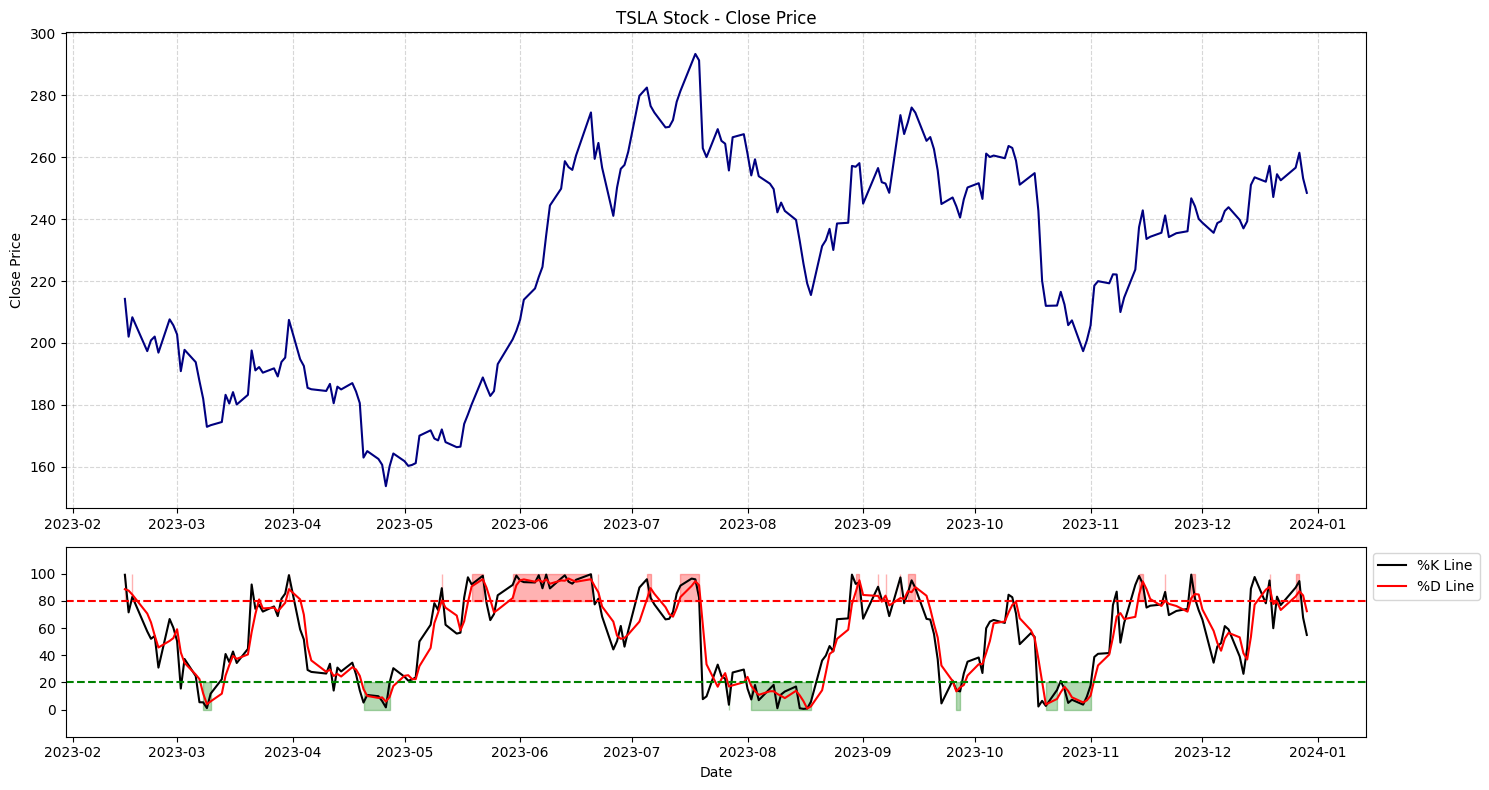

In [32]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), gridspec_kw={'height_ratios': [2.5,1]})

# Plot close price
ax1.plot(df.index, df['Close'], label='Close Price', color='navy')
ax1.set_ylabel('Close Price')
ax1.set_title('TSLA Stock - Close Price')
ax1.grid(visible=True, alpha=0.5, linestyle='--')

# Plot Stochastic Oscillator
ax2.plot(df.index, df['%K'], label='%K Line', color='black')
ax2.plot(df.index, df['%D'], label='%D Line', color='red')
ax2.axhline(y=80, color='red', linestyle='--')
ax2.axhline(y=20, color='green', linestyle='--')
ax2.fill_between(df.index, y1=80, y2=100, where=(df['%K'] > 80) & (df['%D'] > 80), color='red', alpha=0.3)
ax2.fill_between(df.index, y1=0, y2=20, where=(df['%K'] < 20) & (df['%D'] < 20), color='green', alpha=0.3)
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.set_ylim([-20 , 120])
ax2.set_xlabel('Date')
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()


## Visualization Plotly

In [33]:
# Import necessary libraries
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create Figure
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3],
                    vertical_spacing=0.15,  # Adjust vertical spacing between subplots
                    subplot_titles=("Candlestick Chart", "Stochastic Oscillator"))  # Add subplot titles


# Subplot 1: Plot candlestick chart
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='#00cc96',  # Green for increasing
    decreasing_line_color='#ff3e3e',  # Red for decreasing
    showlegend=False
), row=1, col=1)  # Specify row and column indices


# Subplot 2: Plot Stochastic Oscillator
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['%K'],
    mode='lines',
    name='%K Line',
    line=dict(color='black', width=1.5),
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['%D'],
    mode='lines',
    name='%D Line',
    line=dict(color='red', width=1.5),
), row=2, col=1)

# Add overbought/oversold line
fig.add_hline(y=20, col=1, row=2, line_color='red', line_width=1, line_dash='dash')
fig.add_hline(y=80, col=1, row=2, line_color='green', line_width=1, line_dash='dash')

# Update layout with zoom and pan tools enabled
layout = go.Layout(
    title='TSLA Candlestick Chart and Stochastic Oscillator Subplots',
    title_font=dict(size=25),  # Adjust title font size
    plot_bgcolor='#f2f2f2',  # Light gray background
    height=800,
    width=1500,
    xaxis_rangeslider=dict(visible=True, thickness=0.03),
)

# Update the layout of the entire figure
fig.update_layout(layout)
fig.update_yaxes(fixedrange=False, row=1, col=1)
fig.update_yaxes(fixedrange=True, row=2, col=1)
fig.update_xaxes(type='category', row=1, col=1)
fig.update_xaxes(type='category', nticks=10, row=2, col=1)

fig.show()